In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
import string

import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install wordcloud

In [3]:
yelp = pd.read_csv('../00_source_data/preprocessed_data_yelp.csv', encoding='latin-1')
yelp.columns=['label','OriginalText']
yelp.head()

,label,OriginalText
0,2,contrari review zero complaint servic price ge...
1,1,last summer appoint get new tire wait super lo...
2,2,friendli staff starbuck fair get anywher els s...
3,1,food good unfortun servic hit miss main issu s...
4,2,even didnt car filen basement worth bu trip wa...


In [4]:
yelp['Sentiment'] = yelp['label'].map({1:'Negative',2:'Positive'})

In [5]:
yelp

,label,OriginalText,Sentiment
0,2,contrari review zero complaint servic price ge...,Positive
1,1,last summer appoint get new tire wait super lo...,Negative
2,2,friendli staff starbuck fair get anywher els s...,Positive
3,1,food good unfortun servic hit miss main issu s...,Negative
4,2,even didnt car filen basement worth bu trip wa...,Positive
...,...,...,...
37995,1,could give would dont,Negative
37996,2,item selectednchocol cinnamon hornnsmal cinnam...,Positive
37997,1,expens lunch meal fri pickl good waitress mess...,Negative
37998,1,highli overpr food cold waitress seem confus d...,Negative


In [6]:
# print basic data information
print('Dataset shape: ', yelp.shape)
print('Number of unique tweets: ', yelp['OriginalText'].nunique())
print('================================')

# print data types
print(yelp.dtypes)
print('================================')

# print missing values
print('Missing values:')
print(yelp.isnull().sum())
print('================================')

# print label distribution
print('Label distribution:')
print(yelp['Sentiment'].value_counts())

Dataset shape:  (38000, 3)
Number of unique tweets:  37993
label            int64
OriginalText    object
Sentiment       object
dtype: object
Missing values:
label           0
OriginalText    1
Sentiment       0
dtype: int64
Label distribution:
Positive    19000
Negative    19000
Name: Sentiment, dtype: int64


In [7]:
yelp['Sentiment'].value_counts()

Positive    19000
Negative    19000
Name: Sentiment, dtype: int64

In [8]:
yelp.dropna(inplace=True)

### Label Distribution

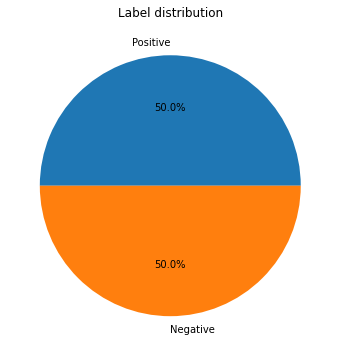

In [9]:
# plot pie chart of label distribution
plt.figure(figsize=(6, 6))
plt.pie(yelp['Sentiment'].value_counts(), labels=yelp['Sentiment'].value_counts().index, autopct='%1.1f%%')
plt.title('Label distribution')

# save the plot as png file
plt.savefig('../30_results/label_distribution.png')

### Word Cloud

In [10]:
def generate_wordcloud(df):
    '''
    Generate wordcloud for a given dataframe
    Input: dataframe
    Output: wordcloud
    '''
    # Create stopword
    stopwords = set(STOPWORDS)
    # Create color map
    color_map = ['Blues_r', 'Greens_r', 'Reds_r', 'Reds', 'Greens']
    # Generate a word cloud image
    for (idx, i) in enumerate(df['Sentiment'].unique()):
        text = df[df['Sentiment'] == i]['OriginalText'].to_string()
        wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap=color_map[idx], collocations=False, stopwords = STOPWORDS).generate(text)
        # Display the generated image
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(i)
        plt.axis("off")
        plt.show()
    

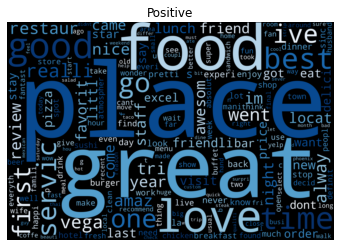

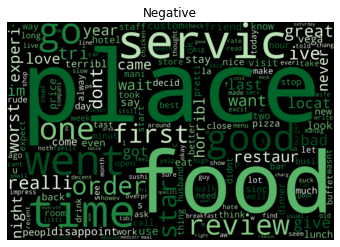

In [11]:
generate_wordcloud(yelp)

### Number of words in a tweet

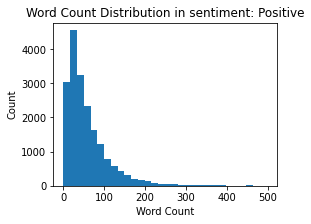

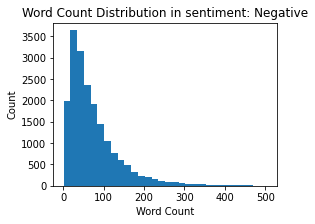

In [12]:
# calculate the word length in each category
yelp['word_count'] = yelp['OriginalText'].apply(lambda x: len(str(x).split(" ")))

# plot word length distribution in each category
for i in yelp['Sentiment'].unique():
    plt.figure(figsize=(4, 3))
    plt.hist(yelp[yelp['Sentiment'] == i]['word_count'], bins=30)
    plt.title(f'Word Count Distribution in sentiment: {i}')
    plt.xlabel('Word Count')
    plt.ylabel('Count')
    plt.show()


### Most common words

In [13]:
# get all the corpus of tweets
def get_corpus(df):
    '''
    Get corpus of tweets
    Input: dataframe
    Output: corpus
    '''
    corpus = []
    for i in df['OriginalText'].str.split():
        for j in i:
            corpus.append(j)
    return corpus

In [14]:
corpus = get_corpus(yelp)

In [15]:
# plot most common words
def plot_most_common_words(df, n):
    '''
    Plot most common words for a given dataframe
    Input: dataframe, number of words to plot
    Output: barplot
    '''
    # get stopwords
    stopwords = set(STOPWORDS)
    # start count
    counter=Counter(corpus)
    most=counter.most_common()
    word=[]
    count=[]
    for i, j in most[:n]:
        if (i not in stopwords) :
            word.append(i)
            count.append(j)
    return word, count

<AxesSubplot:>

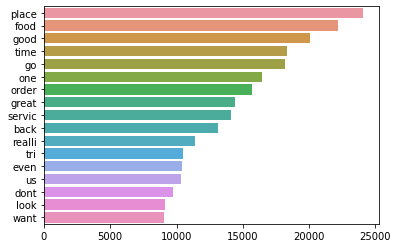

In [16]:
word, count = plot_most_common_words(yelp, 20)
sns.barplot(x=count,y=word)

### Punctuations

In [17]:
# plot the punctuation and its appearance in tweets
def plot_punctuation(corpus):
    '''
    Plot the punctuation and its appearance in tweets
    Input: dataframe
    Output: barplot
    '''
    dic_punc = {}
    punctuation = string.punctuation
    for i in corpus:
        if i in punctuation:
            if i in dic_punc:
                dic_punc[i] += 1
            else:
                dic_punc[i] = 1
    return dic_punc           

In [18]:
# dic_punc = plot_punctuation(corpus)

# # plot punctuation and its appearance in tweets
# plt.figure(figsize=(10, 6))
# plt.bar(dic_punc.keys(), dic_punc.values())
# plt.title('Punctuation and its appearance in tweets')
# plt.show()